In [85]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,Imputer,PolynomialFeatures,StandardScaler,Normalizer
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import cross_val_score

In [86]:
#Change the working directory
os.chdir("C:/Users/rusha/Desktop/Political_endorsements")

In [87]:
#Load the dataset into an pandas dataframe and make a copy
df = pd.read_csv("endorsements-june-30.csv")
df_copy = df.copy()

In [88]:
#Checking the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 9 columns):
year                             109 non-null int64
party                            109 non-null object
candidate                        109 non-null object
endorsement_points               109 non-null int64
percentage_endorsement_points    109 non-null float64
money_raised                     109 non-null float64
percentage_of_money              109 non-null float64
primary_vote_percentage          109 non-null float64
won_primary                      109 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 7.7+ KB


In [89]:
df.describe()

,year,endorsement_points,percentage_endorsement_points,money_raised,percentage_of_money,primary_vote_percentage
count,109.000000,109.000000,109.000000,1.090000e+02,109.000000,109.000000
mean,1996.917431,17.596330,10.091742,5.225899e+06,11.008991,10.807431
std,10.293947,46.078861,19.226760,1.041097e+07,15.148326,18.302088
min,1980.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1988.000000,0.000000,0.000000,1.388260e+05,0.360000,0.110000
50%,1996.000000,2.000000,0.735294,1.567088e+06,5.680000,0.910000
75%,2008.000000,16.000000,9.565220,4.288336e+06,15.970000,14.170000
max,2012.000000,382.000000,96.124000,6.198149e+07,80.910000,75.390000


In [90]:
df.shape

(109, 9)

In [91]:
#Checking the count of values for every columns in our data
df.apply(pd.Series.value_counts)

C:\Users\rusha\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\rusha\Anaconda3\lib\site-packages\pandas\core\frame.py:7356: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)


,year,party,candidate,endorsement_points,percentage_endorsement_points,money_raised,percentage_of_money,primary_vote_percentage,won_primary
2008,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Republican,NaN,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
#Dropping the candidate name and the result column because they are irrelevant to the problem
df = df.drop(["candidate","won_primary"],axis=1)
list(df)

['year',
 'party',
 'endorsement_points',
 'percentage_endorsement_points',
 'money_raised',
 'percentage_of_money',
 'primary_vote_percentage']

In [93]:
df.iloc[:,6].value_counts()

0.00     18
0.28      4
0.11      3
0.19      3
0.22      2
0.29      2
0.01      2
0.21      1
23.81     1
0.07      1
5.17      1
0.76      1
6.14      1
51.91     1
2.40      1
35.85     1
0.09      1
10.55     1
3.90      1
0.43      1
1.71      1
0.88      1
60.65     1
0.17      1
10.89     1
19.19     1
18.05     1
3.41      1
22.00     1
42.37     1
         ..
5.70      1
0.02      1
4.68      1
0.40      1
0.91      1
0.54      1
0.04      1
19.27     1
29.34     1
21.23     1
0.37      1
0.20      1
1.39      1
1.65      1
3.44      1
0.36      1
20.08     1
5.77      1
20.94     1
0.73      1
32.70     1
1.58      1
0.27      1
2.66      1
1.41      1
0.13      1
18.09     1
38.32     1
13.49     1
12.19     1
Name: primary_vote_percentage, Length: 82, dtype: int64

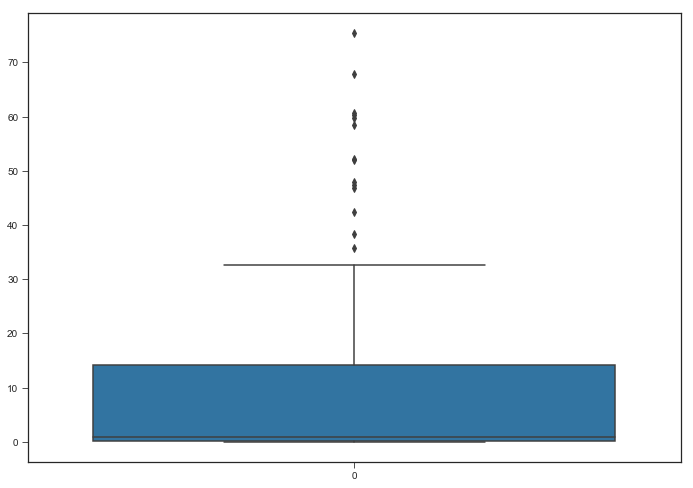

In [100]:
#Checking for outliers but choosing to keep them because they affect the final result and also since the dataset is small
#removing the outliers would be loss of a lot of information.
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

#sns.boxplot(x="variable", y="value", data=pd.melt(df.drop(["party","money_raised"],axis=1)))

#Do this for every column
sns.boxplot(data=df["primary_vote_percentage"])

C:\Users\rusha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\rusha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\rusha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\rusha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


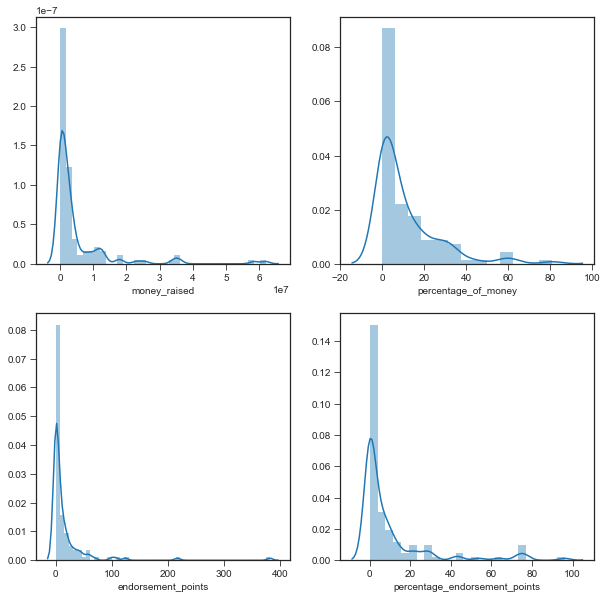

In [109]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.distplot(df["money_raised"])
plt.subplot(222)
sns.distplot(df["percentage_of_money"])
plt.subplot(223)
sns.distplot(df["endorsement_points"])
plt.subplot(224)
sns.distplot(df["percentage_endorsement_points"])

C:\Users\rusha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\rusha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


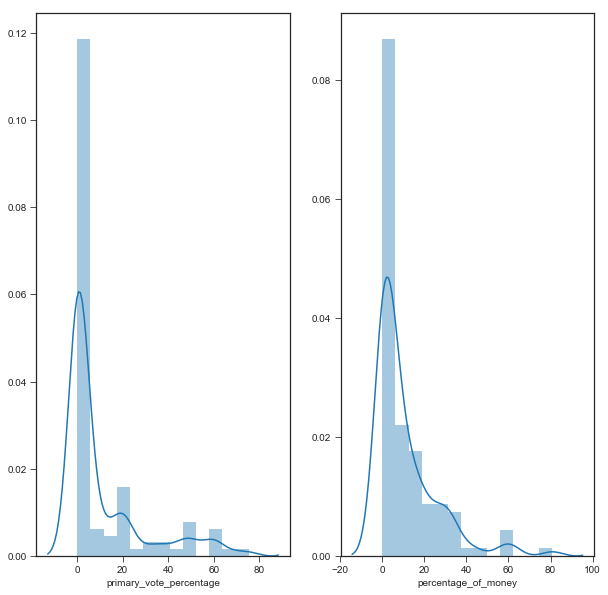

In [112]:
plt.figure(figsize=(10,10))
plt.subplot(121)
sns.distplot(df["primary_vote_percentage"])
plt.subplot(122)
sns.distplot(df["percentage_of_money"])

In [ ]:
#All our data is skewed therefore we need to apply a transform and standardize it for centering of data

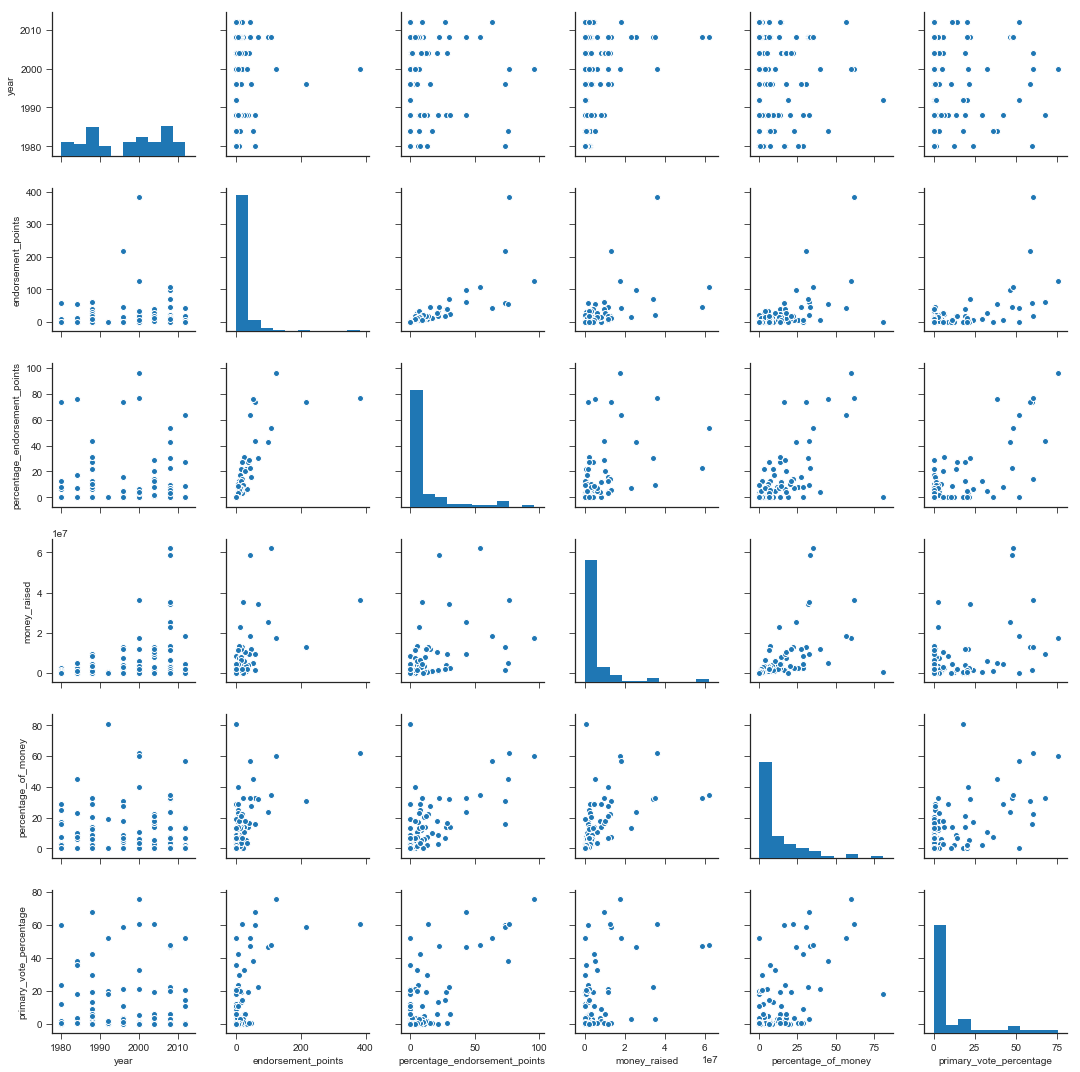

In [113]:
#Multivariate analysis
sns.pairplot(df)